In [ ]:
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.4 MB/s eta 0:00:00


In [ ]:
import hashlib
import math
import os
import binascii

from Crypto.Cipher import AES

In [ ]:
iv_size = 16
key_size = 32
salt_size = 16

cleartext = b'Bomb in the Car'   # Enter Text to be Encrypted
password = b'123'

In [ ]:
# Encryption

salt = os.urandom(16)
derived = hashlib.pbkdf2_hmac('sha256', password, salt, 100000, dklen = iv_size + key_size)

iv = derived[0: iv_size]
key = derived[iv_size:]


encrypted = salt + AES.new(key, AES.MODE_CFB, iv).encrypt(cleartext)

In [ ]:
print(encrypted)

b'"5\x15F\xf2\xf81\xda\\\xfd\n\x9b\xfc4\x8d<\xab\xf9\xa3\xb7QX\xb9\xe4(\xcfZ\xad\t\x19\xe8'


In [ ]:
# Decryption

salt = encrypted[0:salt_size]

derived = hashlib.pbkdf2_hmac('sha256', password, salt, 100000, dklen = iv_size + key_size)

iv = derived[0: iv_size]
key = derived[iv_size:]

cleatext = AES.new(key ,AES.MODE_CFB, iv).decrypt(encrypted[salt_size:])

In [ ]:
print(cleartext)

b'Bomb in the Car'


Normal SteganoGraphy

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
# Steganography

def encode_text(text, encoding= 'utf-8', errors = 'surrogatepass'):
  bits = bin(int.from_bytes(text.encode(encoding, errors), 'big'))[2:]
  return bits.zfill(8* ((len(bits) + 7 ) // 8))

def decode_text(bits, encoding= 'utf-8', errors = 'surrogatepass'):
  n = int(bits,2)
  return n.to_bytes((n.bit_length() + 7) // 8 ,'big').decode(encoding, errors) or '\0'

hidden_message = "Bomb Planted"  # Enter Message Here

encoded_text = encode_text(hidden_message)
decoded_text = decode_text(encoded_text)

In [ ]:
print("Encoded : ", encoded_text)
print("Decoded : ", decoded_text)


Encoded :  010000100110111101101101011000100010000001010000011011000110000101101110011101000110010101100100


Picture SteganoPgraphy

In [ ]:
# Steganography Encryption

def encode_image(filename, text_message):
    # Open Image, store the Shape and convert to 1D list
  input_im = Image.open(filename,'r').convert("RGB")
  image_shape = np.asarray(input_im).shape
  flat_array = np.asarray(input_im).flatten()

  # Encoding the Message
  encoded_text = encode_text(text_message + "<STOP>")

  # Enter message
  encoded_array = [
      (0b11111110 & value ) | int(encode_bit) if ix<len(encoded_text) else value
      for ix, (encode_bit, value) in enumerate(zip(encoded_text.ljust(len(flat_array), '0'), flat_array))]


# Turn Encoded array into image and Print
  encoded_im = np.array(encoded_array).reshape(image_shape)
  return Image.fromarray(np.uint8(encoded_im)).convert("RGB")

 #Insert Image and Code here


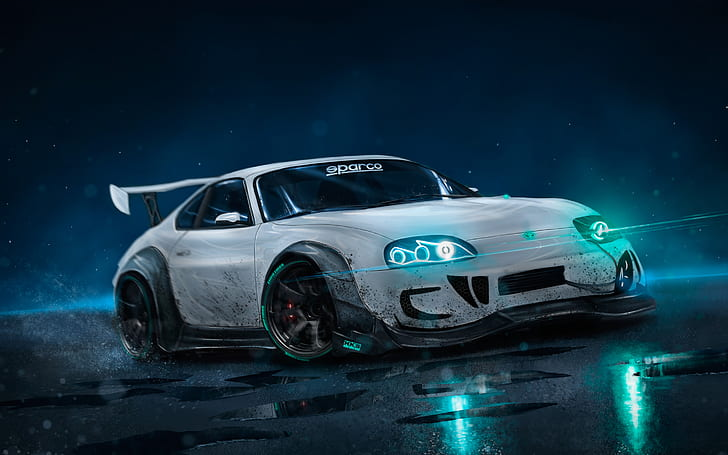

In [ ]:
encoded_im = encode_image('car.jpg', "Ye Raaz uske saath hi chala gaya")
encoded_im.save('i.png')
encoded_im

In [ ]:
def extract_image(filename):
  # open Image
  encoded_im = np.array(Image.open(filename, 'r').convert("RGB"))

  # Extract Least Significant Bits
  extracted_bits = [str(0b00000001 & value) for value in encoded_im.flatten()]

  # Join Bits Together
  extracted_bits = ''.join(extracted_bits)
  return decode_text(extracted_bits,errors='replace').split("<STOP>")[0]


In [ ]:
extract_image('i.png')

'Ye Raaz uske saath hi chala gaya'